In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/Final_Data/Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [3]:
df = df.dropna()

In [4]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

## Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
import xgboost as xgb

In [7]:
regressor = xgb.XGBRegressor()
regressor.fit(X_train,y_train)

[11:40:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [8]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.8606305938167513


In [9]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.7210652962292528


In [10]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

[11:41:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:41:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:41:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:41:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:41:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [11]:
score.mean()

0.6582827367763413

### Model Evaluation

In [12]:
prediction=regressor.predict(X_test)

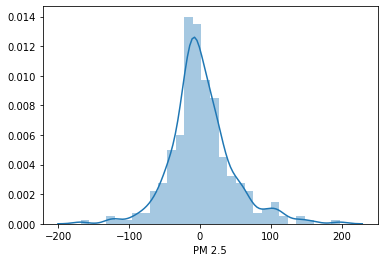

In [13]:
sns.distplot(y_test-prediction)

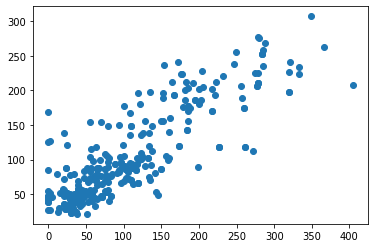

In [14]:
plt.scatter(y_test,prediction)

## Hyperparemeter tuning

In [15]:
xgb.XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [16]:
from sklearn.model_selection import RandomizedSearchCV

In [18]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [20]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

In [21]:
regressor=xgb.XGBRegressor()

In [22]:
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [23]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[11:44:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.7s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[11:44:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   2.0s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[11:44:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   2.4s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[11:44:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   2.9s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[11:44:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weigh

[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[11:45:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.8s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2 
[11:45:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2 
[11:45:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_d

[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.7s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[11:46:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.7s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[11:46:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.8s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[11:46:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=200, min_child_weight

[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   2.0s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[11:47:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   2.0s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[11:47:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   2.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[11:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, ma

[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.9s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[11:47:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   3.2s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[11:48:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   2.5s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[11:48:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1200, min_child_weigh

[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3, total=   2.0s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3 
[11:49:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3, total=   2.3s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3 
[11:49:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3, total=   1.9s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3 
[11:49:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1200, min_child_weigh

[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.9s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[11:49:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   1.0s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[11:49:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   2.1s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[11:49:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6

[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3 
[11:50:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3 
[11:50:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3 
[11:50:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_dept

[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   6.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[11:51:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   6.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[11:51:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   6.1s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[11:51:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1200, min_child_

[CV]  subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   2.3s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5 
[11:53:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   1.6s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5 
[11:53:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   2.4s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5 
[11:53:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=1200, min_child_weigh

[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   1.4s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[11:53:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   1.6s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[11:53:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   1.7s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[11:53:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, m

[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   1.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[11:54:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   1.4s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[11:54:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2, total=   2.6s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[11:54:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, ma

[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   1.8s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[11:55:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   1.3s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[11:55:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   1.1s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[11:55:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, ma

[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   2.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[11:56:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   1.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[11:56:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   1.9s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[11:56:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, ma

[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   0.3s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[11:56:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   1.0s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[11:56:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   1.1s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[11:56:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_de

[CV]  subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   1.9s
[CV] subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1 
[11:57:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   1.9s
[CV] subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1 
[11:57:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   1.9s
[CV] subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1 
[11:57:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=400, min_child_weight=4, ma

[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3 
[11:58:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3 
[11:58:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, total=   0.2s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5 
[11:58:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_dep

[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   4.9s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[11:58:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   1.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[11:58:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   1.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[11:58:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, m

[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   4.5s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1 
[11:59:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   4.1s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1 
[11:59:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   5.1s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1 
[12:00:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1200, min_child_weigh

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 15.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                            

In [24]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1100,
 'min_child_weight': 3,
 'max_depth': 30,
 'learning_rate': '0.05'}

In [27]:
xg_random.best_score_

-1380.5446667169047

In [29]:
predictions=xg_random.predict(X_test)

In [30]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19.02743707274397
MSE: 1355.708107839994
RMSE: 36.8199417142395


In [33]:
import pickle
# open a file, where you ant to store the data
file = open('xgboost_model.pkl', 'wb')

# dump information to that file
pickle.dump(xg_random, file)